# Step 1

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

import cv2 as cv

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import *

from keras.layers import Flatten, Dense, LSTM, Input, Dropout, BatchNormalization,UpSampling2D, Input, add, Conv2D
from keras.models import Model, Sequential

import PIL


# Google Drive mounting for reading data
from google.colab import drive
drive.mount('/content/drive')

# Static seed for reproduction
seed = 0





def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  
  
def plot_preds_mid(preds):
  plt.figure(figsize=(30,20))
  plt.subplot(131)
  plt.title('X_train[0]')
  plt.imshow(x_norm[1])
  plt.subplot(132)
  plt.title('Model Prediction')
  plt.imshow(preds[1])
  plt.subplot(133)
  plt.title('y_mid_train[0]')
  plt.imshow(y_norm[1])
  
def plot_preds_large(preds):
  plt.figure(figsize=(30,20))
  plt.subplot(131)
  plt.title('X_train[0]')
  plt.imshow(x_norm[1])
  plt.subplot(132)
  plt.title('Model Prediction')
  plt.imshow(preds[1])
  plt.subplot(133)
  plt.title('y_large_train[0]')
  plt.imshow(y_large_norm[1])

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!tar -xf '/content/drive/My Drive/Colab Notebooks/class ex/Copy of VOCtrainval_06-Nov-2007.tar'

In [0]:
# import tarfile
# tar = tarfile.open(r"/content/drive/My Drive/Colab Notebooks/class ex/Copy of VOCtrainval_06-Nov-2007.tar")
# tar.extractall()
# tar.close()

In [0]:
X_train = []
y_mid = []
y_large = []
mydir = '/content/VOCdevkit/VOC2007/JPEGImages'

print('Number of images in folder: {}'.format(len(os.listdir(mydir))))

for filename in os.listdir(mydir)[:2500]:
  img = cv.imread(mydir + '/' + filename)
  img = img[:,:,::-1]
  X_train.append(cv.resize(img, (72,72)))
  y_mid.append(cv.resize(img, (144,144)))
  y_large.append(cv.resize(img, (288,288)))
  
X_train = np.array(X_train)
y_mid = np.array(y_mid)
y_large = np.array(y_large)

Number of images in folder: 5011


In [0]:
x_norm = X_train / 255.
y_norm = y_mid / 255.
y_large_norm = y_large / 255.

In [0]:
# X_train = []
# y_mid = []
# y_large = []
# mydir = '/content/drive/My Drive/Colab Notebooks/class ex/'

# x_norm = np.load(mydir + 'x_norm.npy')
# y_norm = np.load(mydir + 'y_norm.npy')
# y_large_norm = np.load(mydir + 'y_large_norm.npy')

In [0]:
# plt.figure(figsize=(10,10))
# plt.subplot(111)
# plt.title('X[0]')
# plt.imshow(X_train[0])

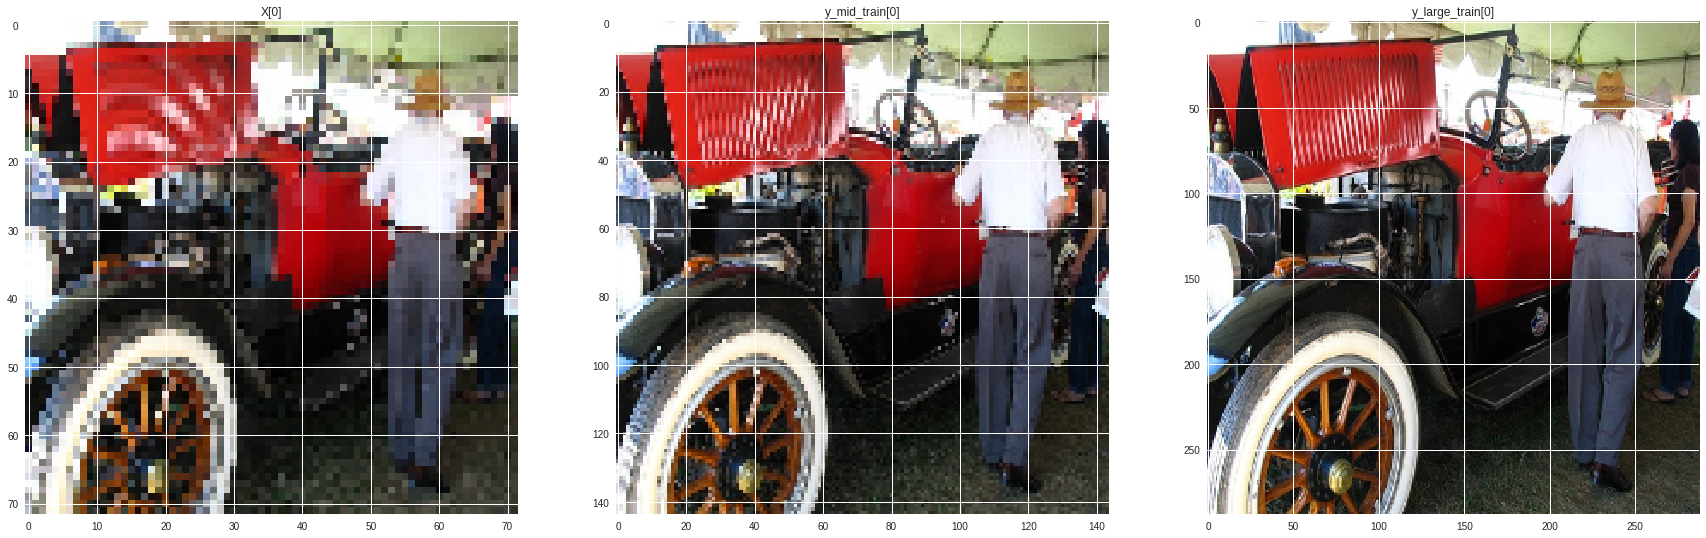

In [0]:
plt.figure(figsize=(30,20))
plt.subplot(131)
plt.title('X[0]')
plt.imshow(X_train[0])
plt.subplot(132)
plt.title('y_mid_train[0]')
plt.imshow(y_mid[0])
plt.subplot(133)
plt.title('y_large_train[0]')
plt.imshow(y_large[0])

In [0]:
# dirpath = './content/drive/My Drive/Colab Notebooks/class ex/'

# np.save(dirpath + '3000/x_norm', x_norm)
# np.save(dirpath + '3000/y_norm', y_norm)
# np.save(dirpath + '3000/y_large_norm', y_large_norm)

# Step 2

In [0]:
inp = Input(shape=(None,None,3))
x = Conv2D(64, (1,1), activation='relu', input_shape=(None,None,3))(inp)
x = Conv2D(64, (1,1), activation='relu')(x)
x = UpSampling2D()(x)
out = Conv2D(3, (1,1))(x)
model = Model(inputs=inp, outputs=out)

model.compile(loss='mean_squared_error',optimizer='adam')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    4160      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 3)     195       
Total params: 4,611
Trainable params: 4,611
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_norm, y_norm, validation_split=0.2, epochs=5, batch_size=32)

Train on 1200 samples, validate on 300 samples
Epoch 1/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1154 - val_loss: 0.0198
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0132 - val_loss: 0.0097
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0090


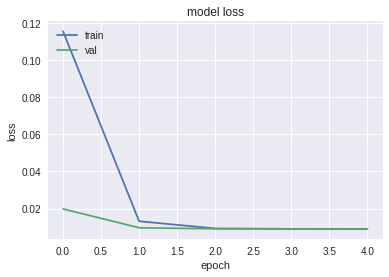

In [0]:
plot_loss(history)

In [0]:
preds = model.predict(x_norm)

In [0]:
preds[0]

In [0]:
plt.figure(figsize=(10,5))
plt.subplot(111)
plt.title('preds')
plt.imshow(preds[0][:,:,:])

In [0]:
plot_preds_mid(preds)

# Step 3

In [0]:
inp = Input(shape=(None,None,3))
x = Conv2D(64, (1,1), activation='relu', input_shape=(None,None,3))(inp)
x = Conv2D(64, (1,1), activation='relu')(x)
x = UpSampling2D()(x)
out1 = Conv2D(3, (1,1))(x)
x = UpSampling2D()(x)
out2 = Conv2D(3, (1,1))(x)

model = Model(inputs=inp, outputs=[out1, out2])

model.compile(loss='mean_squared_error',optimizer='adam')

In [0]:
# y_large_norm = y_large / 255

In [0]:
model.fit(x_norm, [y_norm, y_large_norm], epochs=4, batch_size=32, validation_split = 0.2)

Train on 1200 samples, validate on 300 samples
Epoch 1/4
1200/1200 [==============================] - 11s 9ms/step - loss: 0.1776 - conv2d_6_loss: 0.0883 - conv2d_7_loss: 0.0893 - val_loss: 0.0363 - val_conv2d_6_loss: 0.0178 - val_conv2d_7_loss: 0.0186
Epoch 2/4
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0275 - conv2d_6_loss: 0.0140 - conv2d_7_loss: 0.0135 - val_loss: 0.0224 - val_conv2d_6_loss: 0.0113 - val_conv2d_7_loss: 0.0111
Epoch 3/4
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0199 - conv2d_6_loss: 0.0100 - conv2d_7_loss: 0.0099 - val_loss: 0.0184 - val_conv2d_6_loss: 0.0093 - val_conv2d_7_loss: 0.0091
Epoch 4/4
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0181 - conv2d_6_loss: 0.0091 - conv2d_7_loss: 0.0090 - val_loss: 0.0180 - val_conv2d_6_loss: 0.0091 - val_conv2d_7_loss: 0.0089


In [0]:
preds = model.predict(x_norm)

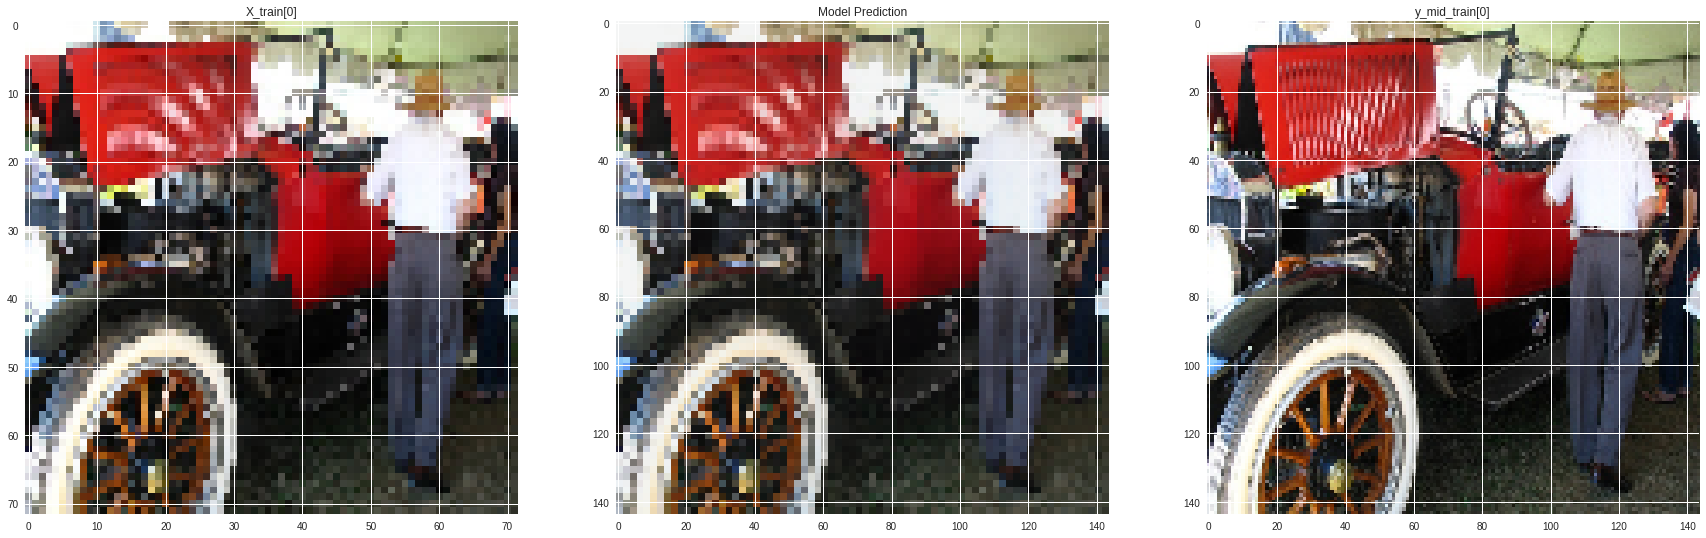

In [0]:
plot_preds_mid(preds[0])

# Step 4

In [0]:
def res_block(inp):
 
  shortcut = inp
  
  x = Conv2D(filters = 64, kernel_size = 3, padding='same')(inp)
  x = Conv2D(filters = 64, kernel_size = 3, padding='same')(x)
  
  x = add([shortcut, x])
  x = Activation('relu')(x)
  
  return x

In [0]:
inp = Input(shape=(None,None,3))
x = Conv2D(64, (1,1), activation='relu', padding='same')(inp)
x = Conv2D(64, (1,1), activation='relu', padding='same')(x)
x = res_block(x)
x = UpSampling2D()(x)
out1 = Conv2D(3, (1,1))(x)
x = res_block(x)
x = UpSampling2D()(x)
out2 = Conv2D(3, (1,1))(x)

model = Model(inputs = inp, outputs=[out1, out2])

model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, None, None, 6 256         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, None, None, 6 4160        conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, None, None, 6 36928       conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_15 

In [0]:
history = model.fit(x = x_norm, y = [y_norm, y_large_norm], validation_split = 0.2, epochs = 4, batch_size = 32)

Train on 1200 samples, validate on 300 samples
Epoch 1/4
1200/1200 [==============================] - 20s 17ms/step - loss: 0.0530 - conv2d_16_loss: 0.0238 - conv2d_19_loss: 0.0292 - val_loss: 0.0196 - val_conv2d_16_loss: 0.0100 - val_conv2d_19_loss: 0.0096
Epoch 2/4
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0173 - conv2d_16_loss: 0.0089 - conv2d_19_loss: 0.0084 - val_loss: 0.0160 - val_conv2d_16_loss: 0.0082 - val_conv2d_19_loss: 0.0078
Epoch 3/4
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0153 - conv2d_16_loss: 0.0080 - conv2d_19_loss: 0.0074 - val_loss: 0.0150 - val_conv2d_16_loss: 0.0078 - val_conv2d_19_loss: 0.0072
Epoch 4/4
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0147 - conv2d_16_loss: 0.0077 - conv2d_19_loss: 0.0071 - val_loss: 0.0146 - val_conv2d_16_loss: 0.0076 - val_conv2d_19_loss: 0.0070


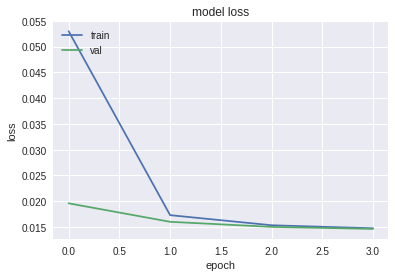

In [0]:
plot_loss(history)

In [0]:
preds = model.predict(x_norm)

In [0]:
preds[0].shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


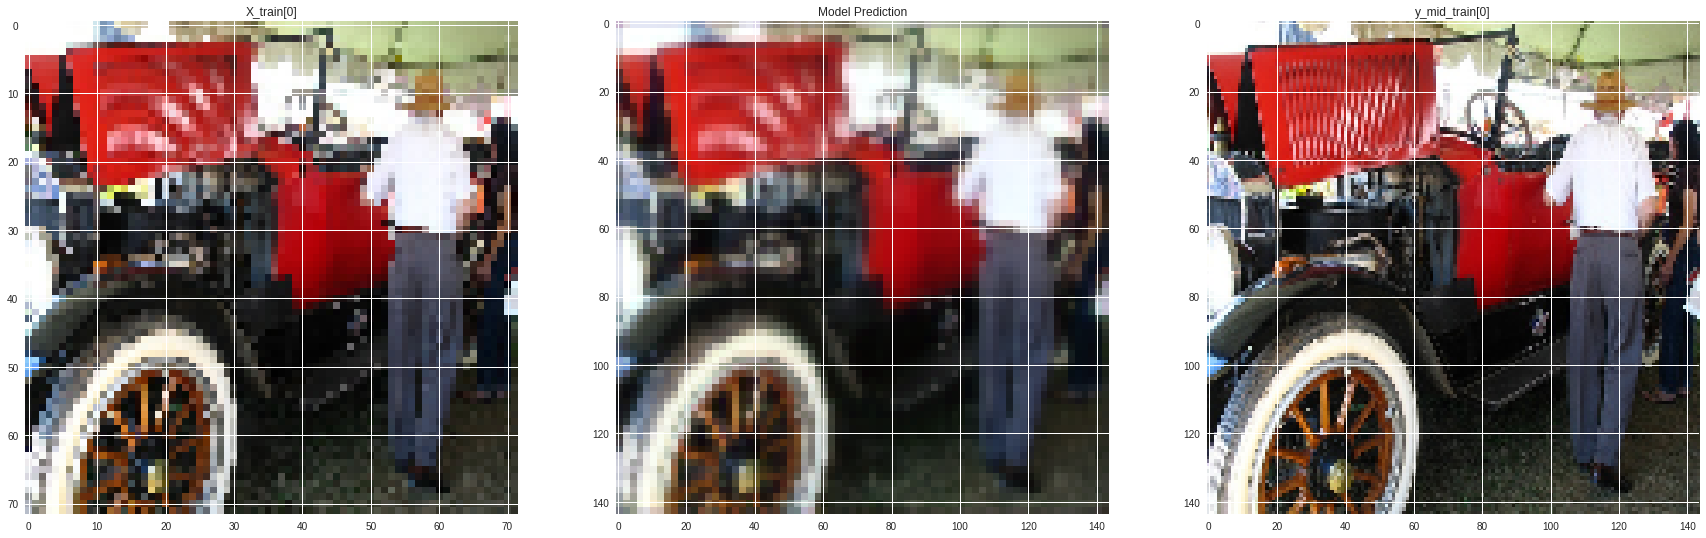

In [0]:
plot_preds_mid(preds[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


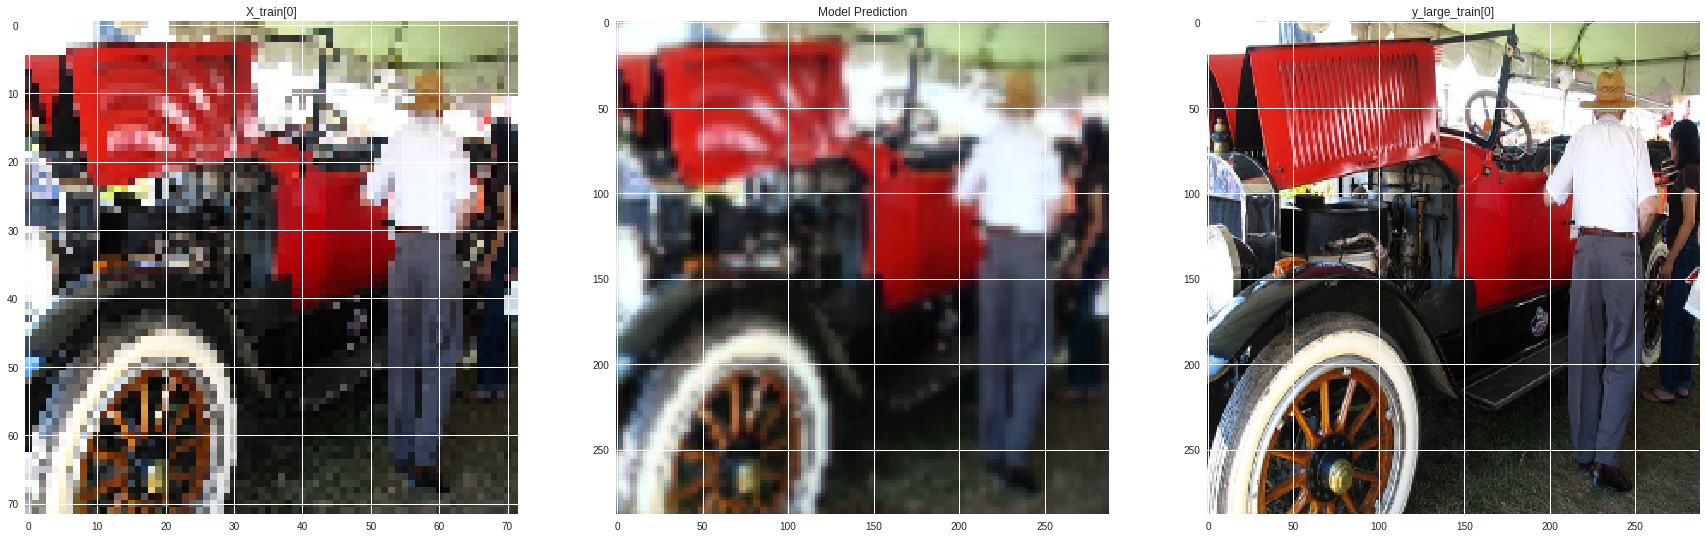

In [0]:
plot_preds_large(preds[1])

# Step 5

In [0]:
from tensorflow import depth_to_space
from keras.applications import VGG16

def SubpixelConv2D(scale, **kwargs):
  return Lambda(lambda x: depth_to_space(x, scale), **kwargs)

In [0]:
def get_fe_model(inp):
  vgg_model = VGG16(weights='imagenet', include_top=False)
#   for layer in vgg_model.layers:
#     layer.Trainable = False;
  tlayer = vgg_model.get_layer('block1_conv2').output
  return Model(inputs = vgg_model.input, outputs = vgg_model.layers[2].output)(inp)

In [0]:
inp = Input(shape=(None, None, 3))
fe = get_fe_model(inp)
x = concatenate([inp, fe], axis = 3)
x = Conv2D(64, (1,1), activation='relu', padding='same')(x)
x = Conv2D(64, (1,1), activation='relu', padding='same')(x)
x = res_block(x)
x = UpSampling2D()(x)
out1 = Conv2D(3, (1,1))(x)
x = res_block(x)
x = UpSampling2D()(x)
out2 = Conv2D(3, (1,1))(x)

model = Model(inputs = inp, outputs=[out1, out2])

model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
history = model.fit(x = x_norm, y = [y_norm, y_large_norm], validation_split = 0.2, epochs = 7, batch_size = 32)

Train on 1200 samples, validate on 300 samples
Epoch 1/4
1200/1200 [==============================] - 20s 17ms/step - loss: 2.3951 - conv2d_32_loss: 1.0335 - conv2d_35_loss: 1.3616 - val_loss: 0.1165 - val_conv2d_32_loss: 0.0665 - val_conv2d_35_loss: 0.0500
Epoch 2/4
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0815 - conv2d_32_loss: 0.0444 - conv2d_35_loss: 0.0371 - val_loss: 0.0610 - val_conv2d_32_loss: 0.0321 - val_conv2d_35_loss: 0.0289
Epoch 3/4
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0512 - conv2d_32_loss: 0.0268 - conv2d_35_loss: 0.0244 - val_loss: 0.0435 - val_conv2d_32_loss: 0.0227 - val_conv2d_35_loss: 0.0208
Epoch 4/4
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0379 - conv2d_32_loss: 0.0199 - conv2d_35_loss: 0.0180 - val_loss: 0.0344 - val_conv2d_32_loss: 0.0181 - val_conv2d_35_loss: 0.0163


In [0]:
preds = model.predict(x_norm)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


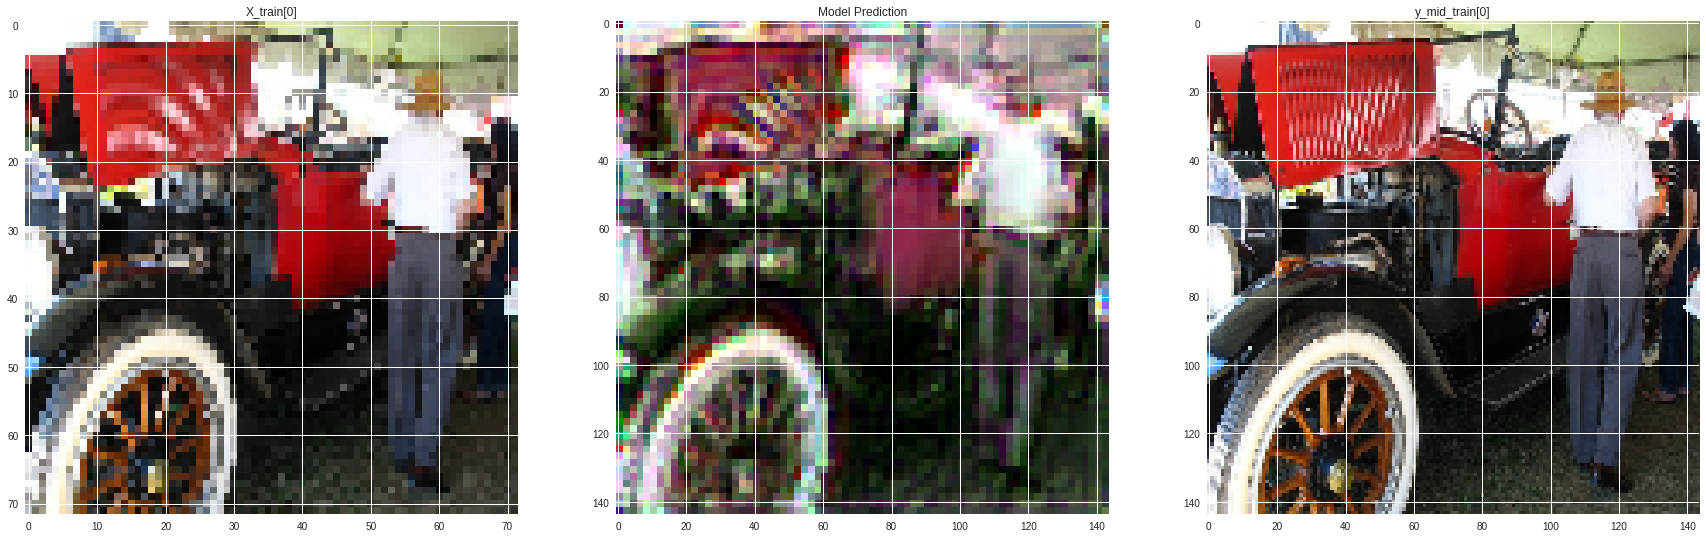

In [0]:
plot_preds_mid(preds[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


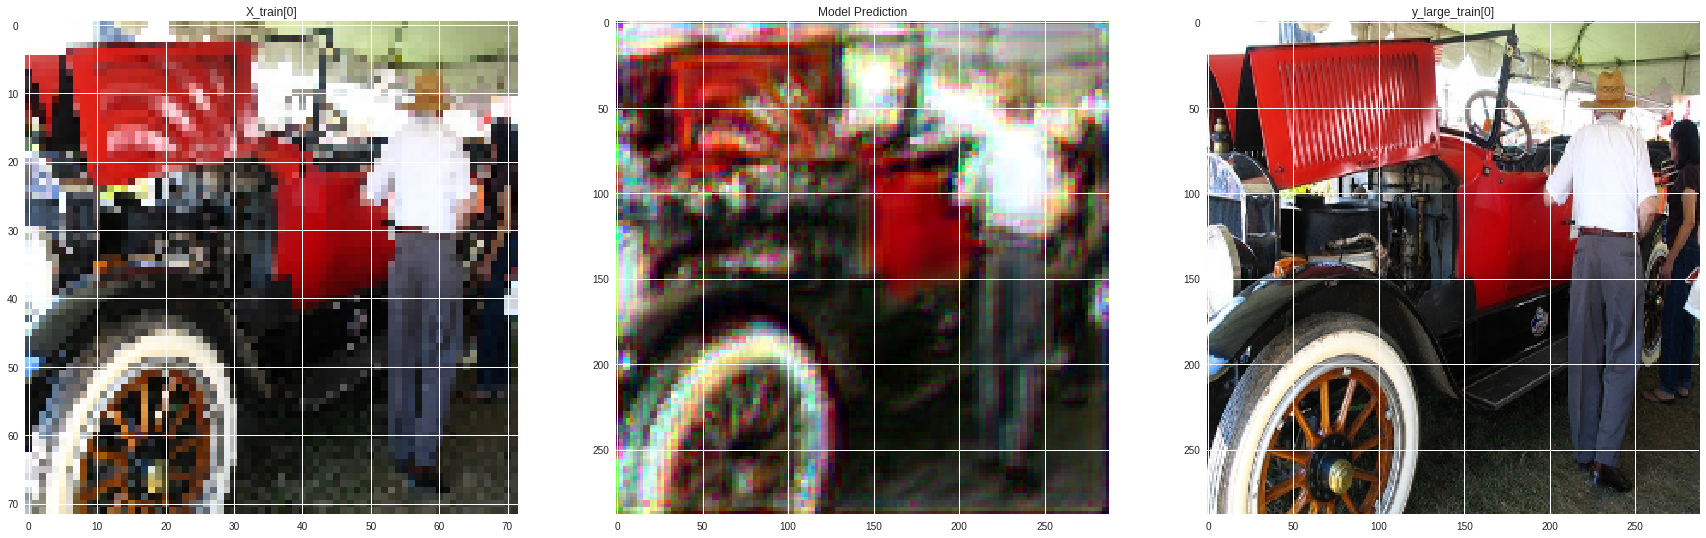

In [0]:
plot_preds_large(preds[1])

# Step 6

In [0]:
inp = Input(shape=(None, None, 3))
fe = get_fe_model(inp)
x = concatenate([inp, fe], axis = 3)
x = Conv2D(64, (1,1), activation='relu', padding='same')(x)
x = Conv2D(64, (1,1), activation='relu', padding='same')(x)
x = res_block(x)
x = SubpixelConv2D(2)(x)
out1 = Conv2D(3, (1,1))(x)
x = Conv2D(64, (1,1), activation='relu', padding='same')(x)
x = res_block(x)
x = SubpixelConv2D(2)(x)
out2 = Conv2D(3, (1,1))(x)

model = Model(inputs = inp, outputs=[out1, out2])

model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
history = model.fit(x = x_norm, y = [y_norm, y_large_norm], validation_split = 0.2, epochs = 10, batch_size = 32)

Train on 2000 samples, validate on 500 samples
Epoch 1/10
2000/2000 [==============================] - 30s 15ms/step - loss: 0.8940 - conv2d_5_loss: 0.5675 - conv2d_9_loss: 0.3265 - val_loss: 0.1330 - val_conv2d_5_loss: 0.0454 - val_conv2d_9_loss: 0.0877
Epoch 2/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.0964 - conv2d_5_loss: 0.0322 - conv2d_9_loss: 0.0642 - val_loss: 0.0723 - val_conv2d_5_loss: 0.0249 - val_conv2d_9_loss: 0.0474
Epoch 3/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.0664 - conv2d_5_loss: 0.0220 - conv2d_9_loss: 0.0443 - val_loss: 0.0614 - val_conv2d_5_loss: 0.0202 - val_conv2d_9_loss: 0.0412
Epoch 4/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.0549 - conv2d_5_loss: 0.0184 - conv2d_9_loss: 0.0364 - val_loss: 0.0478 - val_conv2d_5_loss: 0.0174 - val_conv2d_9_loss: 0.0304
Epoch 5/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.0442 - conv2d_5_loss: 0.0161 - conv2d_9_l

In [0]:
preds = model.predict(x_norm)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


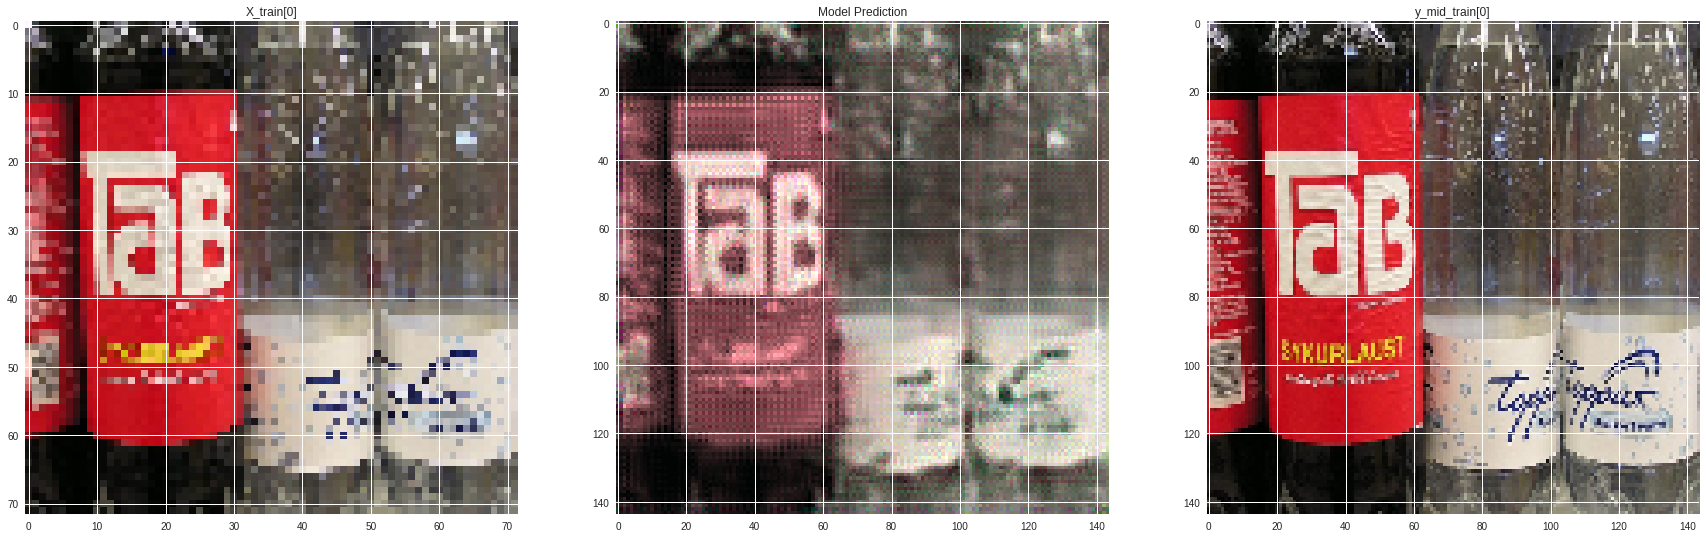

In [0]:
plot_preds_mid(preds[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


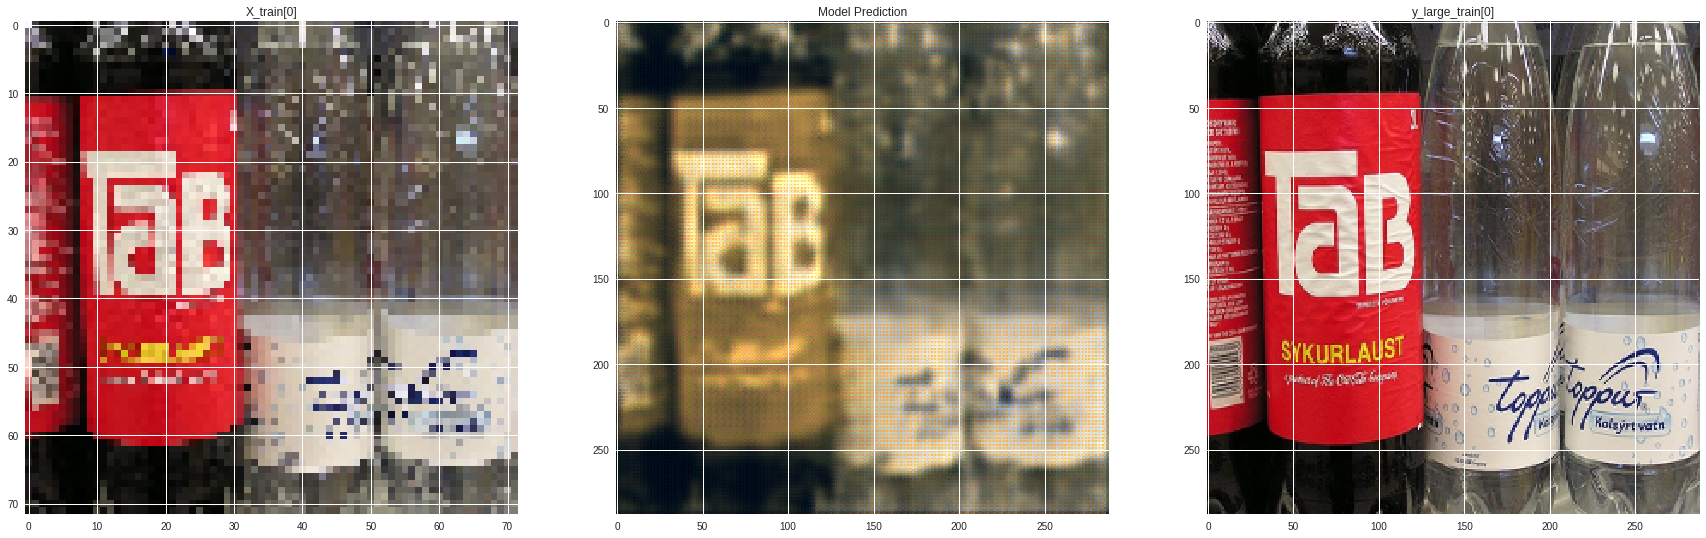

In [0]:
plot_preds_large(preds[1])